Q1) On average, a household receives 9.5 telemarketing phone calls per week. find the probability that a randomly selected household receives exactly 6 telemarketing phone calls during a given week. ( 2 marks)

In [2]:
from scipy.stats import poisson

poisson.pmf(k =6, mu = 9.5 )

0.07642079604012611

Q2) What is the standard error of the sample of 112 observations with standard deviation of 14.  (1 Mark)

In [3]:
import numpy as np 
SD = 14
n  = 112 
SE = (SD/np.sqrt(n))
SE

1.3228756555322951

Q3) On average 20 customers per day cancel their order placed at Fashion Trends Online. Calculate the probability that the number of cancellations on a day is exactly20 and the probability that the maximum number of cancellations is 25? (2 mark)

In [4]:
from scipy.stats import poisson 
poisson.pmf(k = 20,  mu = 20)

0.0888353173920848

Null Hypothesis :  There is no difference between the average salaries with respect to their degree specialization
    
Alternate Hypothesis :  There is a difference between the average salaries with respect to their degree specialization

We Perform One_Way ANOVA test

In [5]:
# Perfrom the test 

In [6]:
import pandas as pd
import numpy as np 


In [7]:
df = pd.read_excel("MBA_Specialization.xlsx")

In [8]:
df.head()

,Specialization,Salary
0,Finance,1.79
1,Finance,1.89
2,Finance,2.20
3,Finance,2.11
4,Finance,1.79


In [9]:
df["Specialization"].value_counts()

HR           44
Marketing    42
Finance      39
Name: Specialization, dtype: int64

In [10]:
eng = df[df["Specialization"]=="Finance"]["Salary"]
sci = df[df["Specialization"]=="Marketing"]["Salary"]
com = df[df["Specialization"]=="HR"]["Salary"]

In [11]:
from scipy.stats import f_oneway

In [12]:
f_oneway(eng,sci,com)

F_onewayResult(statistic=2.303432393079493, pvalue=0.10424546178529744)

In [13]:
# pvalue = 0.1042

In [14]:
# Interpret the Result 

The p_value 0.104 is not less than 0.05 so we fail to reject the null hypothesis stating that There is no difference between the average salaries with respect to their degree specialization.

Q5) Ms Smith was told by Mr Dicki Bird, Chairman of the Career Development Services that one should also look at the work experience in addition to the degree discipline. Ms Smith grouped the students with 2 years and less than 2 years experience and more than 2 years of experience and collected a new set of data. At alpha = 0.05 to check whether the factors-degree discipline and years of work experience-have an impact on the graduating salary?  Use (MBA_Specialization_EXP data)

The null hypotheses for each of the sets are given below. 

* 1) There is no difference between the average salaries with respect to their degree specialization
* 2) There is no difference between the average salaries with respect to their Experience
* 3) There is no interaction between Specialization and Experience.


Alternative Hypothesis:

* 1) There is a difference between the average salaries with respect to their degree specialization
* 2) There is a difference between the average salaries with respect to their Experience 
* 3) There is interaction between Specialization and Experience

We Conduct Two_Way Anova test

In [15]:
df = pd.read_excel("MBA_Specialization_EXP.xlsx")

In [16]:
df.head()

,Specialization,Salary,Experience
0,Finance,1.79,Less_than_2_Yrs
1,Finance,1.89,Less_than_2_Yrs
2,Finance,2.20,Less_than_2_Yrs
3,Finance,2.11,Less_than_2_Yrs
4,Finance,1.79,Less_than_2_Yrs


In [17]:
df["Specialization"].value_counts()

HR           44
Marketing    42
Finance      39
Name: Specialization, dtype: int64

In [18]:
df["Experience"].value_counts()

greater_than_2yrs    76
Less_than_2_Yrs      49
Name: Experience, dtype: int64

In [19]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

formula = 'Salary ~ C(Specialization) + C(Experience) + C(Specialization):C(Experience)'
model = ols(formula,df).fit()
anova_table = anova_lm(model, typ=2)

print(anova_table)

                                    sum_sq     df          F    PR(>F)
C(Specialization)                 1.365513    2.0   4.913325  0.008906
C(Experience)                     2.265114    1.0  16.300456  0.000096
C(Specialization):C(Experience)   1.726546    2.0   6.212376  0.002715
Residual                         16.536261  119.0        NaN       NaN


* p value for Specialization  is 0.008906 and < 0.05 so we reject the null hypothesis (1) and conclude that the Specialization rate is having an effect on Salary
* p value for location  is 0.000096 and < 0.05 so we reject the null hypothesis (2) and conclude that the Experience is having an effect on Salary.
* p value for interaction (Specialization : Experience)  is 0.002715 and < 0.05 so we retain the null hypothesis (3) and conclude that the interaction (Specialization : Experience) is having an effect on Salary.

In [20]:
import pandas as pd

In [21]:
# Prepare the data
CGPA  = [7.8,6.5,7,6,9,8,5.5,6.8,7.8,8.7]
Salary= [11,7,8,6,16,13,6,7,10,13]
df = pd.DataFrame({'CGPA':CGPA, 'Salary':Salary})

In [22]:
df.head()

,CGPA,Salary
0,7.8,11
1,6.5,7
2,7.0,8
3,6.0,6
4,9.0,16


In [23]:
#Exploring the data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
CGPA      10 non-null float64
Salary    10 non-null int64
dtypes: float64(1), int64(1)
memory usage: 288.0 bytes


In [25]:
df.describe()

,CGPA,Salary
count,10.00000,10.000000
mean,7.31000,9.700000
std,1.14256,3.465705
min,5.50000,6.000000
25%,6.57500,7.000000
50%,7.40000,9.000000
75%,7.95000,12.500000
max,9.00000,16.000000


In [26]:
df.shape

(10, 2)

In [27]:
# Plotting the correlation matrix

In [28]:
df.corr()

,CGPA,Salary
CGPA,1.000000,0.952074
Salary,0.952074,1.000000


In [29]:
import seaborn as sns

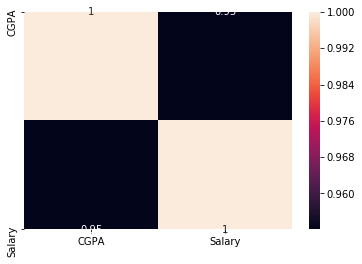

In [30]:
sns.heatmap(df.corr(),annot=True)

In [31]:
# From the heat map We can clearly see there is a high positive correlation between Salary and CGPA 

In [32]:
# Visualize the linear relationship

In [33]:
import matplotlib.pyplot as plt

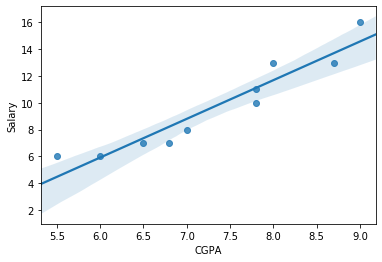

In [34]:
sns.regplot(x= df["CGPA"],y=df["Salary"])

In [35]:
# The relationship between population and sales is linear.

In [36]:
import statsmodels.formula.api as smf

In [37]:
# Building the model

df = smf.ols(formula = 'Salary ~ CGPA', data=df).fit()


In [38]:
# Find the intercept and model coefficients.

In [39]:
print(df.params)

Intercept   -11.410588
CGPA          2.887905
dtype: float64


In [40]:
# Interpret the model

In [41]:
summ = df.summary()
print(summ)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     77.51
Date:                Wed, 12 Feb 2020   Prob (F-statistic):           2.18e-05
Time:                        12:53:10   Log-Likelihood:                -14.246
No. Observations:                  10   AIC:                             32.49
Df Residuals:                       8   BIC:                             33.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.4106      2.424     -4.707      0.0

C:\Users\VARSHA\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [42]:
•From co-efficient of determination, the model explains 90.6% variance in response variable.

•From F-statistic we note that p-Value  2.18e-05 < 0.05 so we conclude that CGPA has significant impact on Salary. 

•From co-efficient table the both coefficients (bo and b1) are significant.


SyntaxError: invalid character in identifier (<ipython-input-42-62aba354916b>, line 1)

Q7) The data shows the body weights of the people before and after attending the yoga sessions for one month, Conduct the appropriate test to check whether the body weights are different after attending the  yoga sessions at 95% C.I ?

In [ ]:
wgts_before_Yoga = [55,54,56,58,59,66,65,66,64,61,62,63,69,68,77,74,77,78,41,44,45,47,48,45,46,46,55,59,66,69,87,88,89,83,102,101,105,99,98,92,91]
wgts_after_Yoga = [51,57,46,55,56,69,61,60,69,64,60,61,67,66,70,71,74,79,45,42,44,49,44,46,47,45,54,57,66,66,87,88,89,81,98,109,99,93,88,82,77]

Null Hypothesis : There is no difference between body_weights 
    
Alternate Hypothesis : There is a difference between body_weights

We conduct Paired t_test 

In [ ]:
from scipy.stats import ttest_rel

ttest_rel(wgts_before_Yoga,wgts_after_Yoga)

Interpret result :

The p_value 0.00355 is less than 0.05, so we reject the null hypothesis stating that there is a difference between the body weights after attending yoga sessions.